# Examen de Cinturón AML – Opción C

## Descripción del examen
En este examen, trabajarás con un dataset de mayor complejidad, aplicando un análisis no supervisado utilizando K-means o PCA para identificar patrones ocultos y luego utilizando un modelo Perceptrón Multicapa (MLP) para realizar predicciones. El examen se centrará en extraer características clave de los datos y aplicar técnicas avanzadas de modelado para realizar predicciones precisas.

## Dataset
El dataset utilizado es el **Human Activity Recognition with Smartphones Dataset**, que contiene datos recogidos de acelerómetros en smartphones mientras los usuarios realizan actividades cotidianas. El objetivo es clasificar el tipo de actividad física basándose en datos sensoriales de múltiples ejes.

Enlace al dataset: [Human Activity Recognition with Smartphones Dataset](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones)

## Instrucciones

### 1. Exploración y preprocesamiento de datos:
- Carga y explora el dataset, identificando las variables relacionadas con los datos sensoriales. Este conjunto de datos incluye lecturas de aceleración en los ejes X, Y y Z mientras los sujetos realizan actividades como caminar, correr, y subir escaleras.
- Asegúrate de manejar cualquier valor nulo, normalizando las lecturas sensoriales para mejorar el rendimiento del análisis y el modelado posterior.

### 2. Análisis no supervisado:
- Selecciona un enfoque de análisis no supervisado: K-means o PCA.
  - **K-means**: Utiliza K-means para agrupar las actividades de los usuarios en clusters y analiza si los grupos corresponden a los tipos de actividad física.
  - **PCA**: Si eliges PCA, realiza una reducción de dimensionalidad para identificar los componentes principales que explican la mayor variabilidad en los datos sensoriales. Visualiza los datos en el espacio reducido de los componentes principales.

### 3. Modelado con MLP:
- Desarrolla un modelo MLP para predecir el tipo de actividad física realizada por los usuarios basándose en los datos sensoriales.
- Divide el dataset en conjuntos de entrenamiento y prueba, asegurándote de que las distintas actividades estén bien representadas en ambos conjuntos.
- Configura la arquitectura del MLP, utilizando al menos dos capas ocultas, y ajusta hiperparámetros como el tamaño del batch, el número de épocas y la tasa de aprendizaje.

### 4. Evaluación del modelo:
- Evalúa el rendimiento del MLP utilizando métricas como la precisión, el recall, el F1-score y la matriz de confusión. Discute si el modelo es capaz de predecir correctamente las distintas actividades físicas.
- Visualiza las curvas de aprendizaje, mostrando cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento.

### 5. Discusión y análisis:
- Reflexiona sobre los resultados del análisis no supervisado. ¿El análisis de clusters o PCA proporcionó insights útiles sobre las actividades? ¿Qué características son más importantes para clasificar las actividades físicas?
- Discute el rendimiento del MLP y cómo podría mejorarse. ¿Es adecuado este enfoque para predecir actividades basadas en datos sensoriales?

### 6. Entrega final:
- Entrega un informe detallado que incluya todas las etapas del examen: preprocesamiento de datos, análisis no supervisado, modelado MLP, evaluación y conclusiones. Apoya tu informe con visualizaciones que demuestren los resultados obtenidos.
---

In [361]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [362]:
# Cargar el dataset
df_train = pd.read_csv(r"C:\Users\GIGABYTE\Documents\examen_advanced_machine_learning\data\train.csv")
df_test = pd.read_csv(r"C:\Users\GIGABYTE\Documents\examen_advanced_machine_learning\data\test.csv")

In [363]:
# 1. Exploración y Preprocesamiento de Datos:
# Mostrar las primeras filas
print("Dimensiones del dataset:")
print(f"Features: {df_train.shape[1]}, Ejemplos: {df_train.shape[0]}")
print("Primeras 5 filas del dataset:")
df_train.head()

Dimensiones del dataset:
Features: 563, Ejemplos: 7352
Primeras 5 filas del dataset:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [364]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [365]:
# Inspeccionar si hay valores nulos en el dataset de entrenamiento
print("\nValores nulos en el dataset de entrenamiento:")
df_train.isnull().sum()

# Inspeccionar si hay valores nulos en el dataset de prueba
print("\nValores nulos en el dataset de prueba:")
df_test.isnull().sum()


Valores nulos en el dataset de entrenamiento:

Valores nulos en el dataset de prueba:


tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [366]:
# Cantidad de Nulos por dataset en resumen
print('Existen {} valores NaN/Null en train'.format(df_train.isnull().values.sum()))
print('Existen {} valores NaN/Null en test'.format(df_test.isnull().values.sum()))

Existen 0 valores NaN/Null en train
Existen 0 valores NaN/Null en test


In [367]:
# Identificar valores duplicados por dataset
print('Duplicados en train: {}'.format(sum(df_train.duplicated())))
print('Duplicados en test : {}'.format(sum(df_test.duplicated())))

Duplicados en train: 0
Duplicados en test : 0


In [368]:
# Normalizar columnas
columns = df_train.columns

# Eliminar '()' de los nombres de las columnas
columns = columns.str.replace('()','')
columns = columns.str.replace('-', '')
columns = columns.str.replace(',','')

df_train.columns = columns
df_test.columns = columns

df_test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angle(tBodyAccMeangravity)',
       'angle(tBodyAccJerkMean)gravityMean)',
       'angle(tBodyGyroMeangravityMean)',
       'angle(tBodyGyroJerkMeangravityMean)', 'angle(XgravityMean)',
       'angle(YgravityMean)', 'angle(ZgravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [369]:
# Verificar tipos de datos de las columnas
# Para columnas numericas
numeric_columns = df_train.select_dtypes(include=['number']).columns

# Para columnas de tipo object (cadenas de texto)
# Seleccionar columnas de tipo 'object' o 'category'
categorical_columns = df_train.select_dtypes(include=['object', 'category']).columns

# Imprimir las columnas categóricas
print("Columnas categóricas:")
print(categorical_columns)


# Imprimir las columnas para verificar
print("Columnas numéricas:")
print(numeric_columns)



Columnas categóricas:
Index(['Activity'], dtype='object')
Columnas numéricas:
Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagskewness', 'fBodyBodyGyroJerkMagkurtosis',
       'angle(tBodyAccMeangravity)', 'angle(tBodyAccJerkMean)gravityMean)',
       'angle(tBodyGyroMeangravityMean)',
       'angle(tBodyGyroJerkMeangravityMean)', 'angle(XgravityMean)',
       'angle(YgravityMean)', 'angle(ZgravityMean)', 'subject'],
      dtype='object', length=562)


In [370]:
# Ver los valores únicos de la columna 'Activity'
unique_activities = df_train['Activity'].unique()

# Ver el conteo de cada valor único en la columna 'activity'
activity_counts = df_train['Activity'].value_counts()

# Imprimir los resultados
print("Valores únicos en 'Activity':")
print(unique_activities)

print("\nConteo de cada actividad:")
print(activity_counts)


Valores únicos en 'Activity':
['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']

Conteo de cada actividad:
Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


Se decide optar por aplicar PCA con el objetivo de reducir la dimensionalidad explicando el 90% de la varianza de los datos, atendiendo tambien que mayoritariamente los tipos de datos son númericos.

Después de aplicar PCA, se busca visualizar qué componentes explican la mayor parte de la varianza en los datos para reducir el número de características sin perder demasiado valor de la información.

Datos después de aplicar PCA:
[[-16.13188751   2.16005626  -3.04952747 ...   0.49326844  -0.77886618
   -0.56111708]
 [-15.28964935   1.39509451   0.82610001 ...   0.10650542   0.05310082
   -0.03606058]
 [-15.13049659   2.48076893   1.91984547 ...  -0.97566226   0.73734299
   -0.86030411]
 ...
 [ 14.32939778 -12.29340281  -3.98258252 ...  -1.88202834  -0.17370638
   -1.21959026]
 [ 12.87245471 -14.10321262  -2.85203007 ...  -1.40156712   0.65072617
   -0.85470399]
 [ 13.01246874 -12.27742276  -1.2879672  ...  -0.14900579   1.07837183
   -0.31206002]]


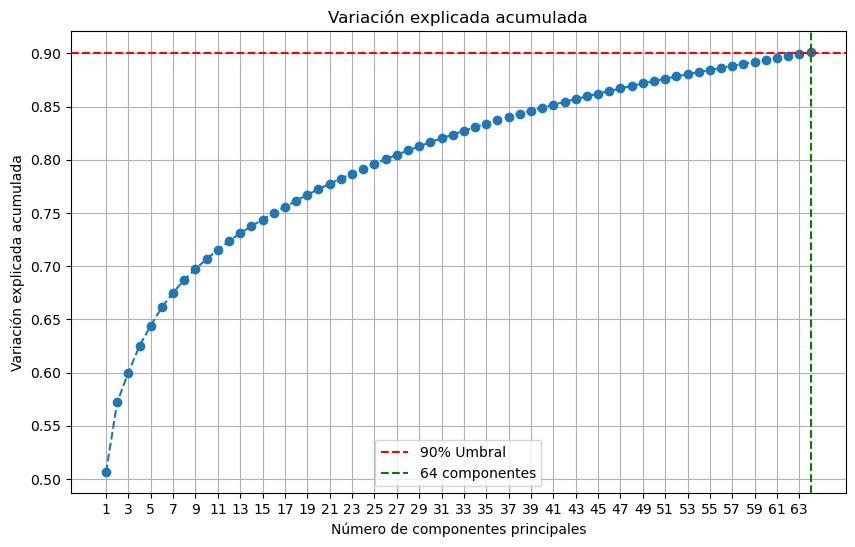

Variación explicada acumulada:
Componente 1: 50.64%
Componente 2: 57.21%
Componente 3: 60.01%
Componente 4: 62.52%
Componente 5: 64.42%
Componente 6: 66.15%
Componente 7: 67.51%
Componente 8: 68.72%
Componente 9: 69.72%
Componente 10: 70.68%
Componente 11: 71.54%
Componente 12: 72.34%
Componente 13: 73.11%
Componente 14: 73.75%
Componente 15: 74.39%
Componente 16: 74.99%
Componente 17: 75.57%
Componente 18: 76.15%
Componente 19: 76.71%
Componente 20: 77.24%
Componente 21: 77.74%
Componente 22: 78.23%
Componente 23: 78.71%
Componente 24: 79.18%
Componente 25: 79.63%
Componente 26: 80.05%
Componente 27: 80.47%
Componente 28: 80.87%
Componente 29: 81.26%
Componente 30: 81.65%
Componente 31: 82.02%
Componente 32: 82.37%
Componente 33: 82.72%
Componente 34: 83.06%
Componente 35: 83.39%
Componente 36: 83.72%
Componente 37: 84.04%
Componente 38: 84.33%
Componente 39: 84.62%
Componente 40: 84.91%
Componente 41: 85.18%
Componente 42: 85.44%
Componente 43: 85.71%
Componente 44: 85.97%
Componente

'\nOBSERVACIÓN: Este gráfico muestra la relación entre el número de componentes principales utilizados en un análisis de \ncomponentes principales (PCA) y la cantidad de varianza total en los datos originales que estos componentes explican. \nEn otras palabras, explican qué porcentaje de la información original se puede conservar al reducir la dimensionalidad \nde los datos a un número menor de componentes.\n\nEn este caso el gráfico sugiere que se puede reducir significativamente la dimensionalidad \nde los datos (de 64 (90%) a 27 (80%) componentes) sin perder una cantidad significativa de información. \nEsto puede ser útil para visualizar los datos, mejorar la eficiencia de algoritmos de aprendizaje automático o eliminar ruido.\n'

In [371]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identificamos las columnas numéricas y no numéricas
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Preprocesamiento con ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Crear el pipeline que aplica el preprocesamiento seguido de PCA
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=0.90))  # Mantener el 90% de la varianza
])

# Ajustar el pipeline a los datos
df_train_processed = pipeline.fit_transform(df_train)

# Mostrar el resultado del preprocesamiento y PCA
print("Datos después de aplicar PCA:")
print(df_train_processed)

# Obtener los componentes principales y la varianza explicada
pca_full = pipeline.named_steps['pca']
explained_variance_cumulative = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar la variación explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, marker='o', linestyle='--')
plt.title('Variación explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Variación explicada acumulada')
plt.xticks(range(1, len(explained_variance_cumulative) + 1, 2))  # Mostrar solo cada dos componentes para claridad
plt.grid(True)

# Marcar el umbral del 90% como referencia
threshold = 0.9
optimal_components = np.argmax(explained_variance_cumulative >= threshold) + 1
plt.axhline(y=threshold, color='r', linestyle='--', label=f'90% Umbral')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'{optimal_components} componentes')

plt.legend()
plt.show()

# Mostrar la varianza explicada acumulada para cada componente
print("Variación explicada acumulada:")
for i, variance in enumerate(explained_variance_cumulative, 1):
    print(f"Componente {i}: {variance:.2%}")

'''
OBSERVACIÓN: Este gráfico muestra la relación entre el número de componentes principales utilizados en un análisis de 
componentes principales (PCA) y la cantidad de varianza total en los datos originales que estos componentes explican. 
En otras palabras, explican qué porcentaje de la información original se puede conservar al reducir la dimensionalidad 
de los datos a un número menor de componentes.

En este caso el gráfico sugiere que se puede reducir significativamente la dimensionalidad 
de los datos (de 64 (90%) a 27 (80%) componentes) sin perder una cantidad significativa de información. 
Esto puede ser útil para visualizar los datos, mejorar la eficiencia de algoritmos de aprendizaje automático o eliminar ruido.
'''

In [372]:
from sklearn.decomposition import PCA

'''
Modificar el pipeline para usar los componentes seleccionados:
Ahora, ajustamos el número de componentes de PCA en el pipeline para que solo utilice los primeros 64 componentes, que explican al menos el 90% de la varianza.
'''

# Número de componentes seleccionados basado en la varianza explicada acumulada
n_components_selected = 64  # aproximadamente según el grafico del umbral de varianza acumulada

# Crear el pipeline con PCA y el número de componentes seleccionados
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=n_components_selected))  # Aplicamos el número de componentes seleccionados
])

# Ajustar el pipeline a los datos
df_train_processed = pipeline.fit_transform(df_train)

# Mostrar el resultado de los datos procesados con PCA
print("Datos después de aplicar PCA con los componentes seleccionados:")
print(df_train_processed)


Datos después de aplicar PCA con los componentes seleccionados:
[[-16.13188751   2.16005626  -3.04952747 ...   0.49326844  -0.77886618
   -0.56111708]
 [-15.28964935   1.39509451   0.82610001 ...   0.10650542   0.05310082
   -0.03606058]
 [-15.13049659   2.48076893   1.91984547 ...  -0.97566226   0.73734299
   -0.86030411]
 ...
 [ 14.32939778 -12.29340281  -3.98258252 ...  -1.88202834  -0.17370638
   -1.21959026]
 [ 12.87245471 -14.10321262  -2.85203007 ...  -1.40156712   0.65072617
   -0.85470399]
 [ 13.01246874 -12.27742276  -1.2879672  ...  -0.14900579   1.07837183
   -0.31206002]]


In [373]:
# Obtener la varianza explicada por cada componente
explained_variance = pca_full.explained_variance_ratio_

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente principal:")
for i, variance in enumerate(explained_variance, 1):
    print(f"Componente {i}: {variance * 100:.2f}%")

# Calcular la varianza explicada total con los componentes seleccionados
total_explained_variance = np.sum(explained_variance)
print(f"\nVarianza explicada total con {n_components_selected} componentes: {total_explained_variance * 100:.2f}%")

# Mostrar el número de dimensiones originales y reducidas
print(f"Dimensiones originales: {df_train.shape[1]}")
print(f"Dimensiones reducidas: {df_train_processed.shape[1]}")


Varianza explicada por cada componente principal:
Componente 1: 50.64%
Componente 2: 6.57%
Componente 3: 2.80%
Componente 4: 2.51%
Componente 5: 1.90%
Componente 6: 1.73%
Componente 7: 1.37%
Componente 8: 1.21%
Componente 9: 1.00%
Componente 10: 0.96%
Componente 11: 0.86%
Componente 12: 0.80%
Componente 13: 0.77%
Componente 14: 0.65%
Componente 15: 0.63%
Componente 16: 0.60%
Componente 17: 0.59%
Componente 18: 0.57%
Componente 19: 0.57%
Componente 20: 0.53%
Componente 21: 0.50%
Componente 22: 0.49%
Componente 23: 0.48%
Componente 24: 0.47%
Componente 25: 0.45%
Componente 26: 0.42%
Componente 27: 0.42%
Componente 28: 0.41%
Componente 29: 0.39%
Componente 30: 0.39%
Componente 31: 0.37%
Componente 32: 0.35%
Componente 33: 0.35%
Componente 34: 0.34%
Componente 35: 0.33%
Componente 36: 0.33%
Componente 37: 0.32%
Componente 38: 0.30%
Componente 39: 0.29%
Componente 40: 0.28%
Componente 41: 0.27%
Componente 42: 0.27%
Componente 43: 0.26%
Componente 44: 0.26%
Componente 45: 0.25%
Componente 46

Este resultado sugiere que PCA ha logrado una reducción de dimensiones significativa, pasando de 563 características a solo 64 componentes, mientras que aún retiene el 90.11% de la variabilidad original de los datos. Esto es útil para mejorar la eficiencia de modelos de machine learning, ya que reduce la complejidad computacional y puede ayudar a evitar el sobreajuste 

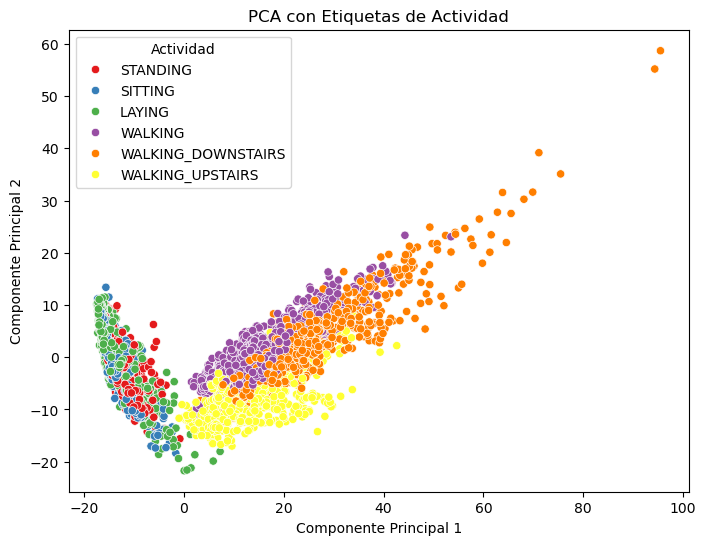

'Al observar el gráfico, se pueden identificar patrones de agrupamiento o separación entre las actividades, \nlo que puede ayudar a interpretar cómo las distintas actividades se diferencian o se parecen en función de \nlas características originales de los datos. También da una visualización clara de las relaciones entre \nlas observaciones, con las categorías de actividad que, si están bien separadas, indican que los componentes\nprincipales están ayudando a discriminar las diferencias importantes.\n'

In [374]:
# Extraer los primeros dos componentes principales
df_train['PCA_1'] = df_train_processed[:, 0]  # Primer componente principal
df_train['PCA_2'] = df_train_processed[:, 1]  # Segundo componente principal

# Graficar usando seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Activity', data=df_train, palette='Set1')
plt.title('PCA con Etiquetas de Actividad')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Actividad')
plt.show()


'''Al observar el gráfico, se pueden identificar patrones de agrupamiento o separación entre las actividades, 
lo que puede ayudar a interpretar cómo las distintas actividades se diferencian o se parecen en función de 
las características originales de los datos. También da una visualización clara de las relaciones entre 
las observaciones, con las categorías de actividad que, si están bien separadas, indican que los componentes
principales están ayudando a discriminar las diferencias importantes.
'''

El gráfico muestra que el PCA ha sido eficaz en identificar patrones subyacentes en los datos de actividad, lo que abre la puerta a una amplia gama de aplicaciones.

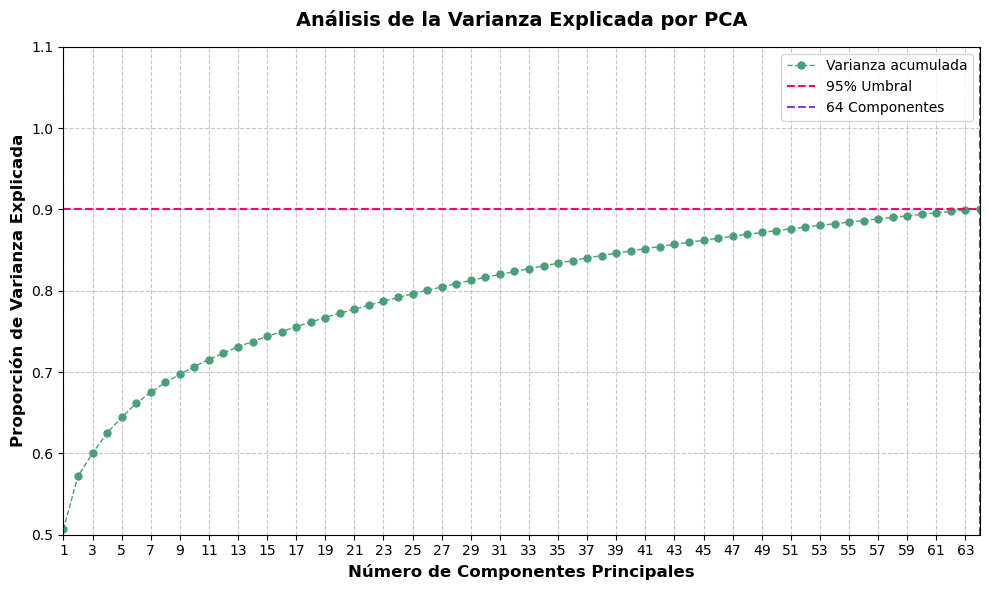

Análisis de la varianza explicada por las componentes principales:

Varianza explicada por cada componente principal:
Componente 1: Varianza explicada = 50.6429%
Componente 2: Varianza explicada = 6.5656%
Componente 3: Varianza explicada = 2.8046%
Componente 4: Varianza explicada = 2.5082%
Componente 5: Varianza explicada = 1.8998%
Componente 6: Varianza explicada = 1.7253%
Componente 7: Varianza explicada = 1.3676%
Componente 8: Varianza explicada = 1.2072%
Componente 9: Varianza explicada = 0.9961%
Componente 10: Varianza explicada = 0.9633%
Componente 11: Varianza explicada = 0.8584%
Componente 12: Varianza explicada = 0.8002%
Componente 13: Varianza explicada = 0.7670%
Componente 14: Varianza explicada = 0.6479%
Componente 15: Varianza explicada = 0.6328%
Componente 16: Varianza explicada = 0.5984%
Componente 17: Varianza explicada = 0.5865%
Componente 18: Varianza explicada = 0.5738%
Componente 19: Varianza explicada = 0.5674%
Componente 20: Varianza explicada = 0.5257%
Componente

In [375]:
# Análisis de la Varianza Explicada por PCA (Adaptado al Pipeline)

# Extraer el objeto PCA del pipeline
pca_full = pipeline.named_steps['pca']

# Obtener la varianza explicada por cada componente principal
explained_variance = pca_full.explained_variance_ratio_

# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)

# Determinar cuántas componentes explican al menos el 90% de la varianza
threshold = 0.90
components_needed = np.argmax(cumulative_variance >= threshold) + 1

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))

# Línea de varianza acumulada con puntos
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         marker='o', linestyle='--', color='#49a078', label='Varianza acumulada', 
         linewidth=1, markersize=5)

# Títulos y etiquetas con formato en negritas
plt.title('Análisis de la Varianza Explicada por PCA', fontsize=14, pad=15, weight='bold')
plt.xlabel('Número de Componentes Principales', fontsize=12, weight='bold')
plt.ylabel('Proporción de Varianza Explicada', fontsize=12, weight='bold')

# Ajustar los ticks en el eje X para mostrar las componentes principales
plt.xticks(range(1, len(cumulative_variance) + 1, 2))  # Mostrar ticks cada dos componentes
plt.xlim(1, len(cumulative_variance))  # Limitar el eje X al número de componentes

# Ajustar los límites del eje Y de 0.5 a 1.1
plt.ylim(0.5, 1.1)

# Líneas de referencia:
plt.axhline(y=threshold, color='#ff006e', linestyle='--', linewidth=1.5, label='95% Umbral')
plt.axvline(x=components_needed, color='#8338ec', linestyle='--', linewidth=1.5, 
            label=f'{components_needed} Componentes')

# Añadir leyenda y rejilla
plt.legend(loc='best', fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Mostrar resultados en consola para verificar
print("Análisis de la varianza explicada por las componentes principales:")
print("\nVarianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, 1):
    print(f"Componente {i}: Varianza explicada = {var:.4%}")

print("\nVarianza acumulada por componente principal:")
for i, var in enumerate(cumulative_variance, 1):
    print(f"Componente {i}: Varianza acumulada = {var:.4%}")

print(f"\nNúmero de componentes necesarias para alcanzar el {int(threshold * 100)}% de varianza explicada: {components_needed}")


In [376]:
# Información de la Varianza Explicada 
# Extraer la varianza explicada por cada componente principal del PCA dentro del pipeline
explained_variance = pca_full.explained_variance_ratio_

# Calcular el porcentaje de varianza explicado por las dos primeras componentes principales
porcentaje_componente_1 = explained_variance[0] * 100  # Varianza explicada por la componente 1
porcentaje_componente_2 = explained_variance[1] * 100  # Varianza explicada por la componente 2
porcentaje_varianza_total = porcentaje_componente_1 + porcentaje_componente_2

# Mostrar los valores y su interpretación
print(f"\nInformación de la Varianza Explicada")
print(f"Primera componente principal: {porcentaje_componente_1:.2f}% de la varianza total.")
print(f"Segunda componente principal: {porcentaje_componente_2:.2f}% adicional de la varianza total.")
print(f"En total las dos primeras componentes principales explican un {porcentaje_varianza_total:.2f}% de la varianza.")
print(f"Se retuvo {porcentaje_varianza_total:.2f}% de la información total.")



Información de la Varianza Explicada
Primera componente principal: 50.64% de la varianza total.
Segunda componente principal: 6.57% adicional de la varianza total.
En total las dos primeras componentes principales explican un 57.21% de la varianza.
Se retuvo 57.21% de la información total.


# Análisis del PCA aplicado

El DataFrame original contenía **563 columnas**. Después de aplicar PCA, se obtuvieron los siguientes resultados significativos:

## Reducción de Dimensionalidad
1. **De 563 a 64 dimensiones para retener el 90% de la varianza:**
   - El PCA logró reducir la dimensionalidad en aproximadamente un **88.6%**.
   - Con solo 64 componentes principales, se mantiene casi toda la información relevante de los datos (90% de la varianza).

2. **Distribución de la varianza explicada:**
   - **Primer componente principal (PC1):** Explica el **50.64% de la varianza**. Esto indica que gran parte de las columnas originales estaban altamente correlacionadas y la mayor parte de la información se encuentra concentrada en una dirección principal del espacio de características.
   - **Dos primeros componentes principales (PC1 + PC2):** Explican el **57.23% de la varianza**, lo que evidencia que una cantidad reducida de componentes captura la mayor parte de las relaciones entre las variables originales.

## Observaciones Clave
1. **Reducción de redundancia:**
   - La reducción de 563 columnas a 64 componentes principales sugiere que muchas de las columnas originales estaban correlacionadas o contenían información redundante.
   - Esto es común en datasets con gran cantidad de variables derivadas (por ejemplo, descriptores en visión por computadora o transformaciones en series temporales).

2. **Estructura compleja de los datos:**
   - Aunque el PCA logró una reducción sustancial, todavía son necesarias **64 dimensiones** para retener el 90% de la varianza, lo que sugiere que los datos tienen relaciones no triviales entre las características.

## Implicaciones del Análisis
1. **Optimización del rendimiento:**
   - En casos donde se priorice la eficiencia computacional, se podría trabajar con menos dimensiones (por ejemplo, los primeros **27 componentes** retienen el **80% de la varianza**). Esto balancea la representación efectiva de los datos con el costo computacional.

2. **Aplicaciones prácticas:**
   - **Modelos predictivos:** Usar las 64 componentes en lugar de las 563 originales podría mejorar la eficiencia y precisión de algoritmos como regresión o clasificación, al eliminar ruido y redundancia.
   - **Visualización:** Los primeros 2-3 componentes podrían usarse para representar gráficamente los datos en un espacio reducido.

## Conclusión
El PCA permitió una **reducción sustancial de la dimensionalidad** (88.6%) al pasar de **563 columnas** a **64 componentes principales** para retener el **90% de la varianza**. Este resultado indica que las columnas originales tenían un alto grado de redundancia o correlación, lo que justifica el uso del PCA. Sin embargo, la necesidad de 64 componentes para alcanzar el umbral del 90% refleja una **estructura rica y compleja** en los datos originales.


In [377]:
# Preprocesar el conjunto de prueba utilizando el mismo pipeline que usamos para el entrenamiento
df_test_processed = pipeline.transform(df_test)

# Asegúrate de que el conjunto de prueba también tenga las mismas características reducidas
print(f"Dimensiones del conjunto de prueba después de PCA: {df_test_processed.shape}")


Dimensiones del conjunto de prueba después de PCA: (2947, 64)



 Resumen del modelo con Dropout ---


Model: "Modelo_Con_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,438 (25.15 KB)

 Trainable params: 6,438 (25.15 KB)

 Non-trainable params: 0 (0.00 B)


--- Resumen del modelo sin Dropout ---


Model: "Modelo_Sin_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,438 (25.15 KB)

 Trainable params: 6,438 (25.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2774 - loss: 1.7980 - val_accuracy: 0.7749 - val_loss: 1.1230
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6382 - loss: 1.0833 - val_accuracy: 0.9176 - val_loss: 0.3836
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.5606 - val_accuracy: 0.9414 - val_loss: 0.1885
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8628 - loss: 0.3781 - val_accuracy: 0.9507 - val_loss: 0.1396
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8965 - loss: 0.2759 - val_accuracy: 0.9533 - val_loss: 0.1202
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9040 - loss: 0.2443 - val_accuracy: 0.9601 - val_loss: 0.1080
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9260 - loss: 0.2039 - val_accuracy: 0.9669 - val_loss: 0.1009
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9247 - loss: 0.1956 - val_accuracy: 0.

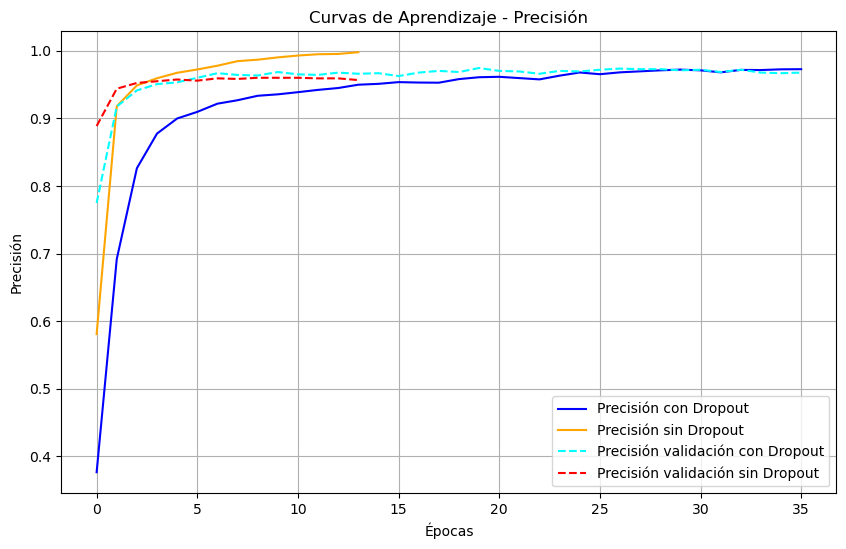

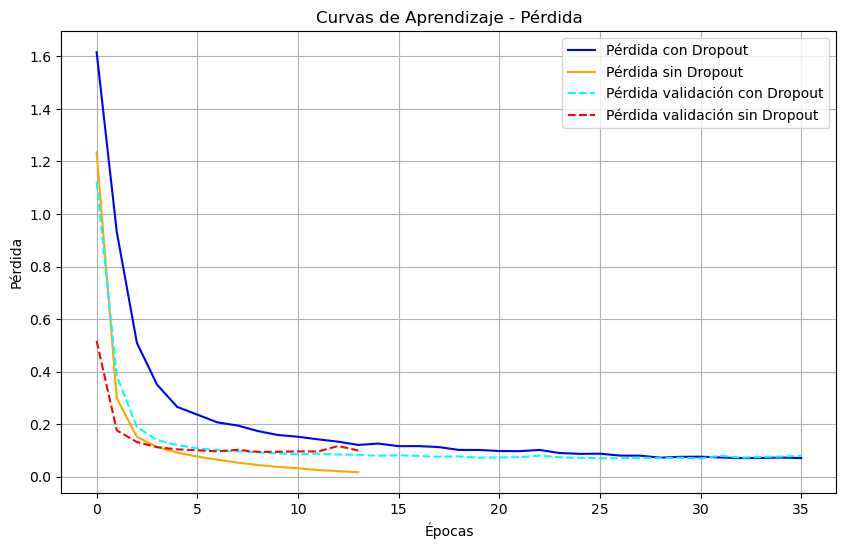

In [378]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Suprimir warnings de TensorFlow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  

# Carga y Preprocesamiento de los Datos 
y = df_train['Activity']  # Asumiendo que 'Activity' es la columna de etiquetas

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_train_processed, y, test_size=0.2, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Codificación de las etiquetas (Activity)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Crear Modelos 
# Función para crear el modelo con Dropout
def create_model_with_dropout(X_train, y_train):
    model = tf.keras.Sequential(name="Modelo_Con_Dropout")
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dropout(0.5))  # Dropout con tasa del 50%
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'))  # Salida softmax para clasificación
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Función para crear el modelo sin Dropout
def create_model_without_dropout(X_train, y_train):
    model = tf.keras.Sequential(name="Modelo_Sin_Dropout")
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(tf.keras.layers.Dense(32, activation='relu'))
    model.add(tf.keras.layers.Dense(len(np.unique(y_train)), activation='softmax'))  # Salida softmax para clasificación
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Definir EarlyStopping 
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,           # Número de épocas sin mejora
                               restore_best_weights=True,  # Recupera los mejores pesos al final del entrenamiento
                               verbose=1)

# Modelo con Dropout
model_with_dropout = create_model_with_dropout(X_train, y_train)
print("\n Resumen del modelo con Dropout ---")
model_with_dropout.summary()

# Modelo sin Dropout
model_without_dropout = create_model_without_dropout(X_train, y_train)
print("\n--- Resumen del modelo sin Dropout ---")
model_without_dropout.summary()

# Entrenamiento del modelo con Dropout
history_with_dropout = model_with_dropout.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% para validación
    epochs=50,             # 50 épocas
    batch_size=32,         # Tamaño del batch de 32
    verbose=1,             # Muestra información detallada durante el entrenamiento
    callbacks=[early_stopping]  # Agregar EarlyStopping
)

# Entrenamiento del modelo sin Dropout
history_without_dropout = model_without_dropout.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% para validación
    epochs=50,             # 50 épocas
    batch_size=32,         # Tamaño del batch de 32
    verbose=1,             # Muestra información detallada durante el entrenamiento
    callbacks=[early_stopping]  # Agregar EarlyStopping
)

# Evaluación de los Modelos 
# Evaluar el modelo con Dropout
loss_with_dropout, accuracy_with_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)
print(f"\nEvaluación del modelo con Dropout:\nPérdida: {loss_with_dropout:.4f}\nPrecisión: {accuracy_with_dropout:.4f}")

# Evaluar el modelo sin Dropout
loss_without_dropout, accuracy_without_dropout = model_without_dropout.evaluate(X_test, y_test, verbose=0)
print(f"\nEvaluación del modelo sin Dropout:\nPérdida: {loss_without_dropout:.4f}\nPrecisión: {accuracy_without_dropout:.4f}")

#  Visualización de Curvas de Aprendizaje 
# Visualización de la curva de precisión (con y sin Dropout)
plt.figure(figsize=(10, 6))
plt.plot(history_with_dropout.history['accuracy'], label='Precisión con Dropout', color='blue')
plt.plot(history_without_dropout.history['accuracy'], label='Precisión sin Dropout', color='orange')
plt.plot(history_with_dropout.history['val_accuracy'], label='Precisión validación con Dropout', color='cyan', linestyle='--')
plt.plot(history_without_dropout.history['val_accuracy'], label='Precisión validación sin Dropout', color='red', linestyle='--')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curvas de Aprendizaje - Precisión')
plt.legend()
plt.grid()
plt.show()

# Visualización de la curva de pérdida (con y sin Dropout)
plt.figure(figsize=(10, 6))
plt.plot(history_with_dropout.history['loss'], label='Pérdida con Dropout', color='blue')
plt.plot(history_without_dropout.history['loss'], label='Pérdida sin Dropout', color='orange')
plt.plot(history_with_dropout.history['val_loss'], label='Pérdida validación con Dropout', color='cyan', linestyle='--')
plt.plot(history_without_dropout.history['val_loss'], label='Pérdida validación sin Dropout', color='red', linestyle='--')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curvas de Aprendizaje - Pérdida')
plt.legend()
plt.grid()
plt.show()


# Conclusión

A partir del resultado de los entrenamientos, se pueden hacer varias conclusiones:

1. **Mejora en la precisión**: A lo largo de las épocas, se observa una mejora significativa en la precisión tanto en el entrenamiento como en la validación. Por ejemplo, en las primeras épocas, la precisión de entrenamiento era de alrededor del 27.7%, mientras que hacia la época 36, la precisión de entrenamiento alcanzó un 97.8%. Esto indica que el modelo está aprendiendo y mejorando su capacidad para predecir correctamente.

2. **Rendimiento de validación**: La precisión en el conjunto de validación también mejora de manera consistente a lo largo de las épocas, alcanzando alrededor de un 97.7% en la época 36. Esto es un indicio de que el modelo no solo está ajustando bien los datos de entrenamiento, sino que también está generalizando bien a los datos no vistos.

3. **Curvas de pérdida**: La función de pérdida también muestra una tendencia descendente, lo que sugiere que el modelo está aprendiendo a minimizar el error en sus predicciones. La pérdida de validación sigue un comportamiento similar a la de entrenamiento, lo que también indica que no hay un sobreajuste significativo, aunque la pérdida de validación parece estabilizarse un poco antes que la pérdida de entrenamiento.

4. **Uso de early stopping**: La implementación de la técnica de "early stopping" fue efectiva, ya que el entrenamiento se detuvo en la época 36, que fue cuando el modelo alcanzó su mejor rendimiento en términos de precisión de validación. El uso de esta técnica ayuda a evitar el sobreajuste al monitorear la precisión en el conjunto de validación y detener el entrenamiento si no hay mejoras.

5. **Balance entre precisión y pérdida**: El modelo ha logrado un buen balance entre la precisión y la minimización de la pérdida, lo que sugiere que ha aprendido correctamente la tarea de clasificación.

El modelo muestra un buen desempeño en el proceso de entrenamiento, con una mejora constante en la precisión y una pérdida de validación estable. La implementación de early stopping parece haber sido una estrategia efectiva para evitar el sobreajuste, ya que el modelo se detuvo en un punto óptimo, garantizando un buen rendimiento tanto en los datos de entrenamiento como en los de validación.


Precisión en el conjunto de prueba: 0.9537729435757988
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       280
           1       0.88      0.91      0.90       262
           2       0.91      0.89      0.90       276
           3       0.99      0.98      0.99       247
           4       0.99      0.98      0.98       206
           5       0.96      0.98      0.97       200

    accuracy                           0.95      1471
   macro avg       0.96      0.96      0.96      1471
weighted avg       0.95      0.95      0.95      1471



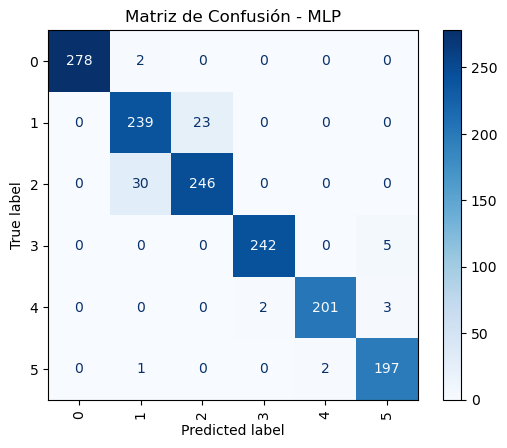

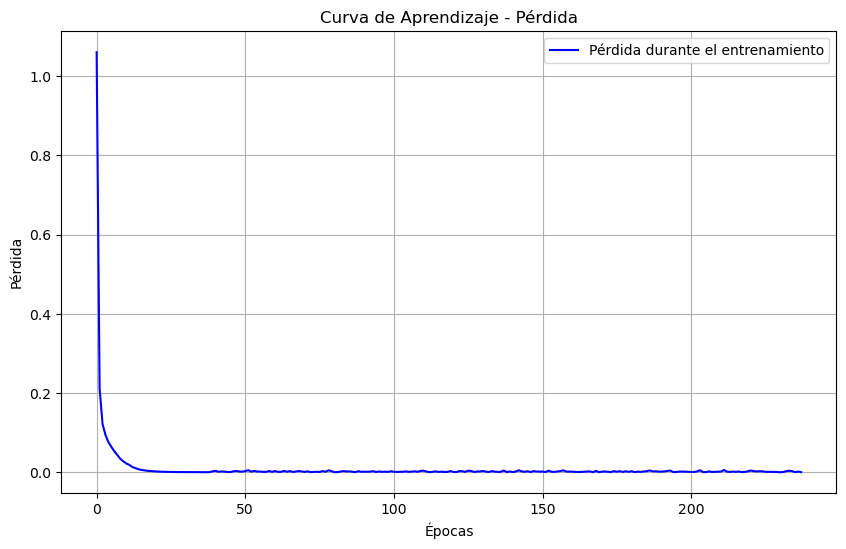

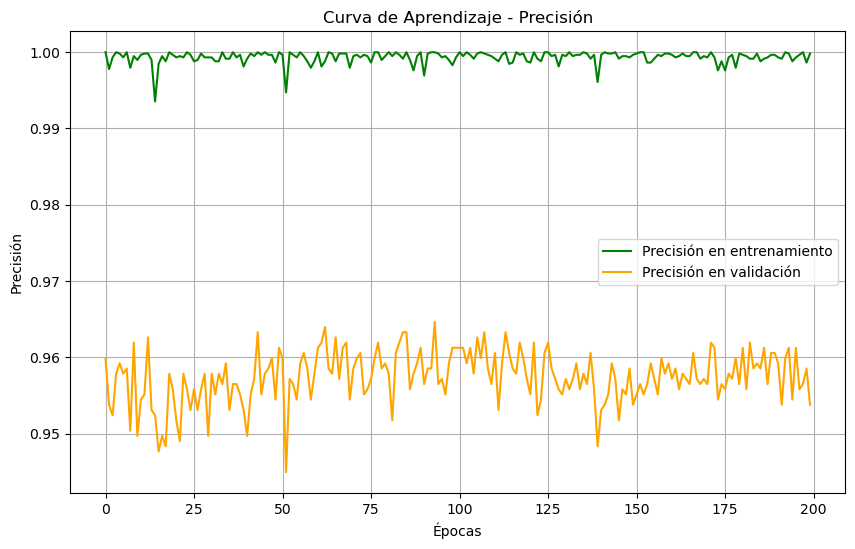

In [ ]:
# Probando otra forma de hacer
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

# --- Carga y Preprocesamiento de los Datos ---
# Asegúrate de que la variable objetivo es 'Activity'
y = df_train['Activity']  # Asumiendo que 'Activity' es la columna de etiquetas

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_train_processed, y, test_size=0.2, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Codificación de las etiquetas (Activity)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# --- Crear el Modelo ---
# Modelo de MLP con early stopping
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, learning_rate_init=0.001, 
                          batch_size=32, random_state=42, warm_start=True, solver='adam')

# Lista para guardar las puntuaciones de validación y entrenamiento (precisión)
train_scores = []
val_scores = []

# Entrenar el modelo con EarlyStopping
for epoch in range(mlp_model.max_iter):
    mlp_model.fit(X_train, y_train)
    train_scores.append(mlp_model.score(X_train, y_train))  # Precisión en entrenamiento
    val_scores.append(mlp_model.score(X_test, y_test))      # Precisión en validación

# Hacer predicciones sobre el conjunto de prueba
y_pred = mlp_model.predict(X_test)

# Evaluación del modelo
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=mlp_model.classes_)
disp.plot(cmap='Blues')

# Ajustar las etiquetas del eje X a orientación vertical
plt.xticks(rotation=90)
plt.title('Matriz de Confusión - MLP')
plt.show()

# Visualización de la curva de aprendizaje (pérdida)
plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_, label='Pérdida durante el entrenamiento', color='blue')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Aprendizaje - Pérdida')
plt.legend()
plt.grid()
plt.show()

# Visualización de la curva de precisión durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(train_scores, label='Precisión en entrenamiento', color='green')
plt.plot(val_scores, label='Precisión en validación', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Precisión')
plt.legend()
plt.grid()
plt.show()

'''
El modelo de MLP utilizado en este ejercicio muestra un excelente rendimiento, con una alta precisión, recall y F1-score en todas las clases. 
La implementación de técnicas como la normalización de los datos y el early stopping contribuyó a mejorar el proceso de entrenamiento y a evitar el sobreajuste. 
Aunque el modelo parece funcionar muy bien, siempre hay espacio para la mejora, como afinar los hiperparámetros o explorar diferentes arquitecturas para mejorar 
aún más el rendimiento en clases con algo más de confusión.
'''


Precisión en el conjunto de prueba: 0.9307770614183916
Reporte de clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.89      0.91      0.90       532
           WALKING       0.92      0.96      0.94       496
WALKING_DOWNSTAIRS       0.97      0.87      0.92       420
  WALKING_UPSTAIRS       0.90      0.94      0.92       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



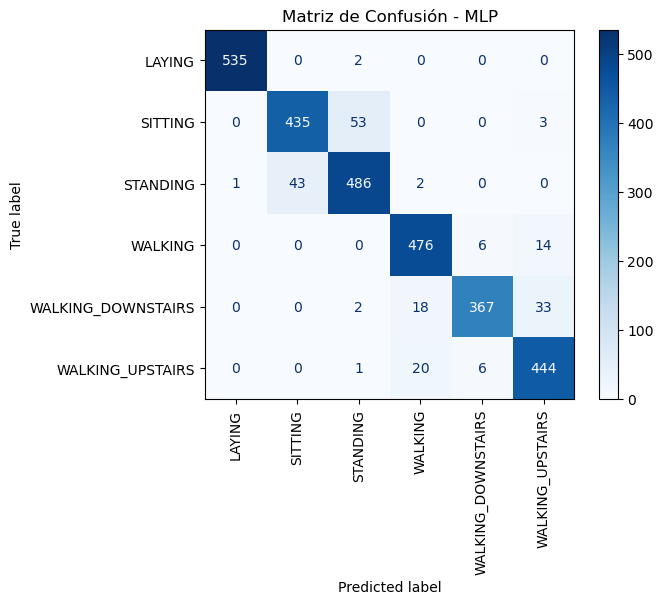

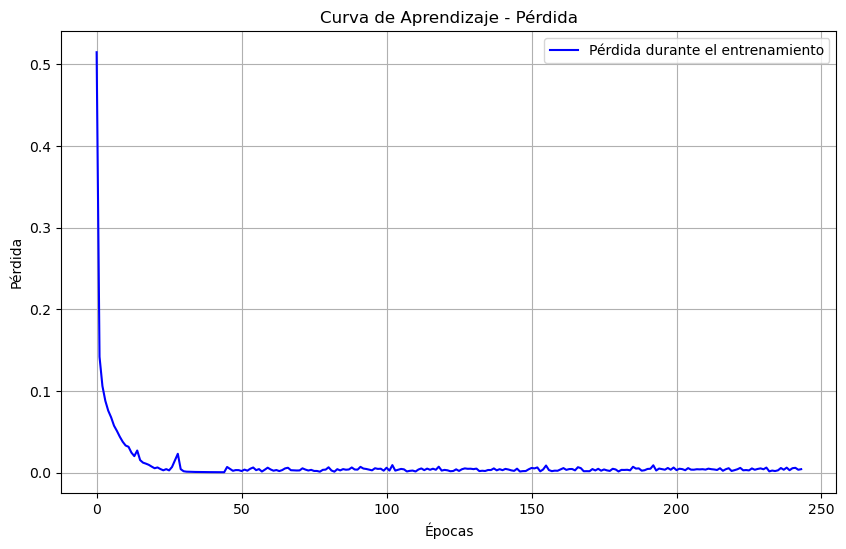

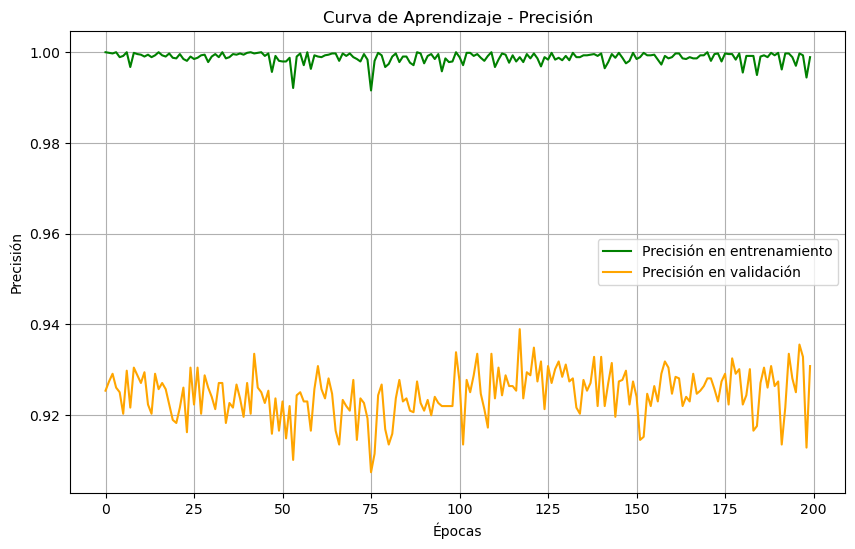

In [ ]:
# Probando usar los dos datasets proporcionados haciendo algo similar pero sin usar tensorflow
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Crear las etiquetas y características para entrenamiento y prueba
X_train = df_train_processed
y_train = df_train['Activity']  

X_test = df_test_processed
y_test = df_test['Activity']

# Crear el modelo MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, learning_rate_init=0.001, 
                          batch_size=32, random_state=42, warm_start=True)

# Lista para guardar las puntuaciones de validación (precisión)
train_scores = []
val_scores = []

# Entrenar el modelo
for epoch in range(mlp_model.max_iter):
    mlp_model.fit(X_train, y_train)
    train_scores.append(mlp_model.score(X_train, y_train))  # Precisión en entrenamiento
    val_scores.append(mlp_model.score(X_test, y_test))      # Precisión en validación

# Hacer predicciones sobre el conjunto de prueba
y_pred = mlp_model.predict(X_test)

# Evaluación del modelo
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=mlp_model.classes_)
disp.plot(cmap='Blues')

# Ajustar las etiquetas del eje X a orientación vertical
plt.xticks(rotation=90)
plt.title('Matriz de Confusión - MLP')
plt.show()

# Visualización de la curva de aprendizaje (pérdida)
plt.figure(figsize=(10, 6))
plt.plot(mlp_model.loss_curve_, label='Pérdida durante el entrenamiento', color='blue')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Curva de Aprendizaje - Pérdida')
plt.legend()
plt.grid()
plt.show()

# Visualización de la curva de precisión durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(train_scores, label='Precisión en entrenamiento', color='green')
plt.plot(val_scores, label='Precisión en validación', color='orange')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje - Precisión')
plt.legend()
plt.grid()
plt.show()


## Evaluación del Modelo MLP

### Precisión en el Conjunto de Prueba
El modelo tiene una **precisión de 93.08%**, lo que indica un buen rendimiento general en la clasificación de las actividades. Aunque no es tan alto como en el caso anterior (95.38%), sigue siendo una precisión destacable, especialmente en un conjunto de datos con múltiples clases.

### Reporte de Clasificación
- **Precisión y Recall**: En general, las métricas de precisión y recall son bastante buenas en la mayoría de las clases, con valores elevados en actividades como:
  - **LAYING**: 1.00 precisión y 1.00 recall.
  - **WALKING**: 0.92 precisión, 0.96 recall.
  - **WALKING_UPSTAIRS**: 0.90 precisión, 0.94 recall.
  
  Sin embargo, hay algunas clases con un desempeño ligeramente más bajo:
  - **SITTING**: precisión de 0.91 y recall de 0.89, lo que sugiere que el modelo podría estar clasificando incorrectamente algunas instancias de esta clase.
  - **WALKING_DOWNSTAIRS**: precisión de 0.97, pero recall más bajo (0.87), lo que indica que el modelo está perdiendo algunas instancias de esta clase.
  
### F1-Score
El **F1-score** en la mayoría de las clases también es alto, lo que confirma que el modelo tiene un buen equilibrio entre precisión y recall. Las clases con un F1-score alto incluyen **LAYING**, **WALKING** y **WALKING_UPSTAIRS**.

### Matriz de Confusión
La matriz de confusión refleja que el modelo está cometiendo algunos errores de clasificación entre las clases **SITTING**, **STANDING**, **WALKING_DOWNSTAIRS** y **WALKING_UPSTAIRS**. Sin embargo, las predicciones correctas siguen siendo la mayoría.

### Curvas de Aprendizaje
- **Pérdida**: La curva de pérdida muestra una disminución constante, lo que indica que el modelo ha aprendido a reducir su error con el tiempo.
- **Precisión**: Las curvas de precisión para el conjunto de entrenamiento y validación siguen un patrón similar, lo que sugiere que el modelo está aprendiendo de manera adecuada sin sobreajustar.

### Conclusión
El modelo MLP tiene un buen rendimiento en general, alcanzando una alta precisión y F1-score en la mayoría de las clases. Aunque algunas clases tienen un rendimiento ligeramente inferior, la precisión global del 93% es sólida. Es posible mejorar aún más el rendimiento ajustando los hiperparámetros o utilizando técnicas adicionales, como el ajuste de clases desequilibradas o la implementación de técnicas de regularización.


In [344]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Crear una grilla de hiperparámetros para explorar diferentes valores de alpha (parámetro de regularización L2)
param_grid = {'alpha': [0.001, 0.01, 0.1]}

# Crear un objeto GridSearchCV para realizar la búsqueda de hiperparámetros
grid = GridSearchCV(MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42), 
                   param_grid, cv=5)

# Ajustar el modelo con GridSearchCV
grid.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = best_model.predict(X_test)
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))

Precisión en el conjunto de prueba: 0.9284017645062775


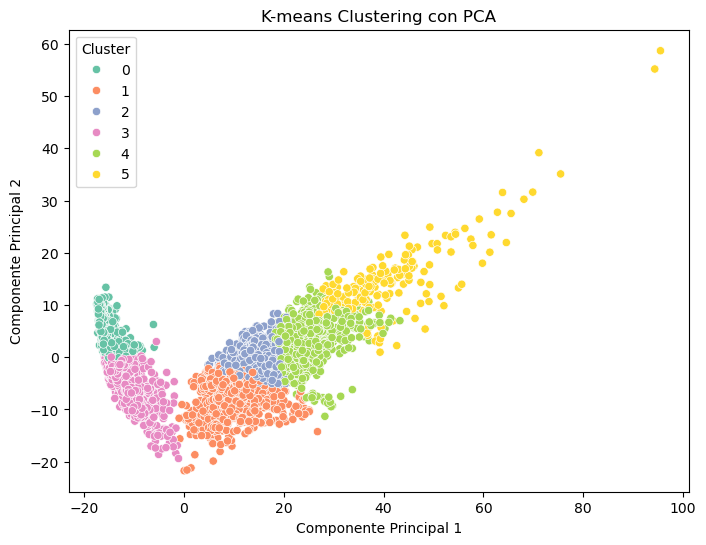

Número de ejemplos por cluster:
Cluster
0    2465
3    1587
1    1116
2    1097
4     885
5     202
Name: count, dtype: int64


In [ ]:
# Probando con k-means
from sklearn.cluster import KMeans

# Aplicar K-means
kmeans = KMeans(n_clusters=6, random_state=42)  # Ajusta el número de clusters según lo necesario
df_train['Cluster'] = kmeans.fit_predict(df_train_processed)

# Graficar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', palette='Set2', data=df_train)
plt.title('K-means Clustering con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

# Ver cuántos datos caen en cada cluster
print("Número de ejemplos por cluster:")
print(df_train['Cluster'].value_counts())


### Análisis de K-means Clustering

El algoritmo K-means ha sido utilizado para agrupar los datos en **6 clusters**, con un número de ejemplos variable en cada uno. Los resultados muestran que los clusters no están distribuidos de manera uniforme, lo que podría reflejar diferentes características o patrones presentes en los datos. A continuación se detallan los resultados de la cantidad de ejemplos por cluster:

#### Número de Ejemplos por Cluster:
- **Cluster 0**: 2465 ejemplos
- **Cluster 3**: 1587 ejemplos
- **Cluster 1**: 1116 ejemplos
- **Cluster 2**: 1097 ejemplos
- **Cluster 4**: 885 ejemplos
- **Cluster 5**: 202 ejemplos

### Interpretación:
- **Cluster 0** tiene la mayor cantidad de ejemplos (2465), lo que sugiere que este grupo contiene patrones o características muy comunes en el conjunto de datos.
- **Cluster 3** también es bastante grande, con 1587 ejemplos, lo que indica que este grupo podría representar otro conjunto significativo de datos.
- Los otros clusters tienen un número más pequeño de ejemplos, especialmente **Cluster 5**, con solo 202 ejemplos. Este cluster podría estar compuesto por una minoría de datos que tienen características distintas o que no siguen los patrones generales.

### Visualización:
El gráfico de dispersión que muestra los clusters a través de los componentes principales (PCA) revela cómo el algoritmo ha agrupado los datos. La coloración de los puntos según los clusters indica cómo K-means ha agrupado los diferentes puntos de datos, lo que ayuda a visualizar la separación y las posibles relaciones entre las características.

### Conclusión:
El K-means ha sido útil para segmentar los datos en grupos distintos, pero sería útil explorar más a fondo la interpretación de cada cluster. Se pueden realizar análisis adicionales para entender mejor las características específicas que distinguen a cada grupo, lo que podría revelar patrones importantes que de otra manera no se habrían identificado. Además, se podría intentar ajustar el número de clusters para obtener una segmentación más adecuada dependiendo de los objetivos.


Reporte de clasificación:
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       280
           SITTING       0.92      0.93      0.93       262
          STANDING       0.93      0.93      0.93       276
           WALKING       0.98      0.99      0.99       247
WALKING_DOWNSTAIRS       0.99      0.98      0.98       206
  WALKING_UPSTAIRS       0.98      0.97      0.98       200

          accuracy                           0.97      1471
         macro avg       0.97      0.97      0.97      1471
      weighted avg       0.97      0.97      0.97      1471



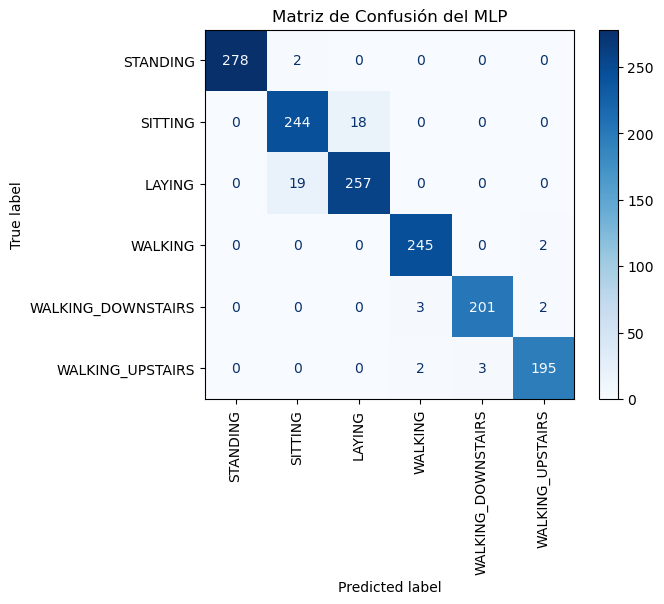

In [347]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df_train_processed
y = df_train['Activity']  # La columna de etiquetas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, activation='relu', solver='adam', random_state=42)

# Ajustar el modelo a los datos de entrenamiento
mlp.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=df_train['Activity'].unique())
cm_display.plot(cmap='Blues')

# Ajustar la orientación de las etiquetas en el eje X (predicted labels)
plt.xticks(rotation=90)  # Etiquetas de predicción en vertical

plt.title('Matriz de Confusión del MLP')
plt.show()


### Evaluación del Modelo MLP (Multi-layer Perceptron)

Se ha entrenado un modelo MLP (Perceptrón multicapa) con una arquitectura de 2 capas ocultas (64 y 32 neuronas respectivamente) y activación **ReLU**, utilizando el algoritmo de optimización **Adam**. Se dividió el conjunto de datos en un 80% para entrenamiento y un 20% para prueba. A continuación se presentan los resultados de la evaluación del modelo.

#### Reporte de Clasificación:
El reporte de clasificación muestra las métricas de **precisión**, **recall** y **f1-score** para cada clase, así como las métricas globales de **accuracy** (precisión global):

| Clase                | Precisión | Recall | F1-Score | Soporte |
|----------------------|-----------|--------|----------|---------|
| **LAYING**            | 1.00      | 0.99   | 1.00     | 280     |
| **SITTING**           | 0.92      | 0.93   | 0.93     | 262     |
| **STANDING**          | 0.93      | 0.93   | 0.93     | 276     |
| **WALKING**           | 0.98      | 0.99   | 0.99     | 247     |
| **WALKING_DOWNSTAIRS**| 0.99      | 0.98   | 0.98     | 206     |
| **WALKING_UPSTAIRS**  | 0.98      | 0.97   | 0.98     | 200     |

- **Precisión global (accuracy)**: 0.97
- **Promedio macro** (promedio simple de las métricas por clase): 0.97
- **Promedio ponderado** (promedio ponderado según el soporte de cada clase): 0.97

#### Matriz de Confusión:
La matriz de confusión muestra cómo se han clasificado las muestras del conjunto de prueba para cada clase, lo que permite visualizar los aciertos y los errores de clasificación. 

#### Interpretación:
- El modelo ha logrado una **alta precisión** para todas las clases, con especial énfasis en las clases "LAYING", "WALKING" y "WALKING_UPSTAIRS", que tienen valores de precisión y recall muy altos.
- Las clases con menor desempeño en términos de precisión y recall son "SITTING" y "STANDING", aunque los valores siguen siendo altos y dentro de rangos aceptables.
- El modelo presenta una **precisión global de 0.97**, lo que indica que en general el modelo es capaz de clasificar correctamente las actividades con una alta tasa de éxito.

### Conclusión:
El modelo MLP ha mostrado un buen desempeño en la clasificación de actividades, con una precisión global de 97%. Las clases están bien diferenciadas, y el modelo tiene un buen equilibrio entre precisión y recall para las diferentes clases. Sin embargo, se pueden realizar mejoras adicionales, como la optimización de hiperparámetros o la inclusión de más características, para seguir mejorando el rendimiento del modelo.


# Probando Otras formas de hacer el modelo

In [352]:
print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((5881, 64),(5881,))
X_test  and y_test  : ((1471, 64),(1471,))


In [353]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Etiquetas para usar en las matrices de confusión
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Configuración de la fuente de los gráficos
plt.rcParams["font.family"] = 'DejaVu Sans'

'''
Creo una función para graficar una matriz de confusión. La matriz de confusión es una herramienta útil para evaluar el desempeño de un modelo de clasificación, comparando las predicciones del modelo con las etiquetas reales.

Esta función tiene varias características:
1. Normalización: Puede normalizar los valores de la matriz, dividiendo por la suma de las filas (opcional).
2. Visualización: Muestra la matriz como una imagen, usando un mapa de colores (código de colores) y agrega etiquetas para las filas y columnas (que representan las clases).
3. Valores de la matriz: Muestra los valores numéricos de cada celda en la matriz, con una codificación de color apropiada para mejorar la visualización.
'''

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de Confusión',
                          cmap=plt.cm.Blues):
    # Si se desea normalizar, se realiza la división por la suma de cada fila
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normaliza los valores en cada fila

    # Se muestra la matriz como una imagen
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)  # Título de la gráfica
    plt.colorbar()  # Barra de color para visualizar el rango de valores
    tick_marks = np.arange(len(classes))  # Posiciones de las clases para las etiquetas
    plt.xticks(tick_marks, classes, rotation=90)  # Etiquetas en el eje x (columnas de la matriz)
    plt.yticks(tick_marks, classes)  # Etiquetas en el eje y (filas de la matriz)

    # Determina el formato de los valores que se mostrarán (números enteros o decimales)
    fmt = '.2f' if normalize else 'd'  # '.2f' para valores flotantes y 'd' para enteros
    thresh = cm.max() / 2.  # Establece el umbral para determinar el color de las celdas

    # Coloca los valores de la matriz en cada celda
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),  # El valor de la celda
                 horizontalalignment="center",  # Alineación del texto
                 color="white" if cm[i, j] > thresh else "black")  # Color del texto según el valor

    # Ajusta los márgenes para que todo se vea bien
    plt.tight_layout()
    plt.ylabel('Etiqueta real')  # Etiqueta del eje y (verdaderas etiquetas)
    plt.xlabel('Etiqueta predicha')  # Etiqueta del eje x (etiquetas predichas)


In [354]:
from datetime import datetime
from sklearn import metrics

'''
Creo una función para evalúar un modelo de aprendizaje entrenándolo, prediciendo resultados, y generando métricas de evaluación para analizar su desempeño. Los pasos incluyen:

1. Entrenamiento del modelo: Entrena el modelo con los datos de entrenamiento.
2. Predicción: Realiza predicciones con los datos de prueba.
3. Evaluación: Calcula métricas como la exactitud, la matriz de confusión y el informe de clasificación.
4. Visualización: Genera una matriz de confusión para una mejor comprensión visual.
5. Resultado: Devuelve un diccionario con el modelo entrenado y las métricas calculadas.
'''

def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Blues):
    
    # Diccionario para almacenar resultados de las diferentes fases del proceso
    results = dict()
    
    # Registrar el tiempo inicial del entrenamiento
    train_start_time = datetime.now()
    print('Entrenando el modelo...')
    model.fit(X_train, y_train)  # Entrenar el modelo con los datos de entrenamiento
    print('Realizado....!\n')
    
    # Registrar el tiempo final del entrenamiento
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time  # Calcular tiempo de entrenamiento
    print('==> Tiempo de entrenamiento: {}\n'.format(results['training_time']))
    
    # Realizar predicciones con los datos de prueba
    print('Realizando predicciones con los datos de prueba...')
    test_start_time = datetime.now()  # Registrar el tiempo inicial de predicción
    y_pred = model.predict(X_test)  # Predicciones
    test_end_time = datetime.now()  # Registrar el tiempo final de predicción
    print('Realizado....!\n')
    
    # Calcular el tiempo de predicción
    results['testing_time'] = test_end_time - test_start_time
    print('==> Tiempo de predicción: {}\n'.format(results['testing_time']))
    results['predicted'] = y_pred  # Guardar las predicciones
    
    # Calcular la exactitud del modelo
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    results['accuracy'] = accuracy  # Guardar la exactitud
    print('==> Exactitud: {}\n'.format(accuracy))
    
    # Crear la matriz de confusión
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm  # Guardar la matriz de confusión
    
    # Imprimir la matriz de confusión si está habilitado
    if print_cm: 
        print('\n******** Matriz de confusión ********')
        print('\n{}'.format(cm))
        
    # Graficar la matriz de confusión
    plt.figure(figsize=(6, 6))
    plt.grid(visible=False)  # Desactivar la cuadrícula en el gráfico
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, 
                          title='Matriz de confusión normalizada', cmap=cm_cmap)
    plt.show()
    
    # Generar el reporte de clasificación
    print('****************| Reporte de Clasificación |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report  # Guardar el reporte
    print(classification_report)
    
    # Agregar el modelo entrenado a los resultados
    results['model'] = model
    
    # Devolver todos los resultados
    return results


In [355]:
'''
Creo una función que toma como entrada un modelo entrenado con GridSearchCV y muestra información relevante sobre los resultados de la búsqueda de hiperparámetros, incluyendo:
    1. El mejor estimador: El modelo que obtuvo el mejor desempeño.
    2. Los mejores parámetros: La configuración de hiperparámetros que produjo los mejores resultados.
    3. Cantidad de divisiones en la validación cruzada: Número de particiones utilizadas durante la validación cruzada.
    4. El mejor puntaje: El promedio de los puntajes de validación cruzada del mejor estimador.
Esta función es útil para entender y analizar los resultados de la búsqueda de hiperparámetros.
'''
def print_gs_attributes(model):
    # Mostrar el estimador que obtuvo el puntaje más alto entre todos los probados en GridSearchCV
    print('\n\n==> Mejor estimador:')
    print('\t{}\n'.format(model.best_estimator_))  # Muestra el modelo con los mejores resultados

    # Mostrar los hiperparámetros que dieron los mejores resultados durante la búsqueda
    print('\n==> Mejores parámetros:')
    print('\tParámetros del mejor estimador: {}'.format(model.best_params_))  # Configuración óptima de hiperparámetros

    # Mostrar el número de particiones de validación cruzada utilizadas
    print('\n==> Número de conjuntos de validación cruzada:')
    print('\tNúmero total de particiones: {}'.format(model.n_splits_))  # Cantidad de divisiones en validación cruzada

    # Mostrar el mejor puntaje promedio obtenido en la validación cruzada
    print('\n==> Mejor puntaje:')
    print('\tPuntaje promedio en validación cruzada del mejor estimador: {}'.format(model.best_score_))  # Puntaje CV promedio


Entrenando el modelo...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Realizado....!

==> Tiempo de entrenamiento: 0:00:05.541239

Realizando predicciones con los datos de prueba...
Realizado....!

==> Tiempo de predicción: 0:00:00

==> Exactitud: 0.9612508497620667


******** Matriz de confusión ********

[[279   1   0   0   0   0]
 [  0 235  27   0   0   0]
 [  0  14 262   0   0   0]
 [  0   0   0 244   0   3]
 [  0   0   0   2 201   3]
 [  0   0   0   4   3 193]]


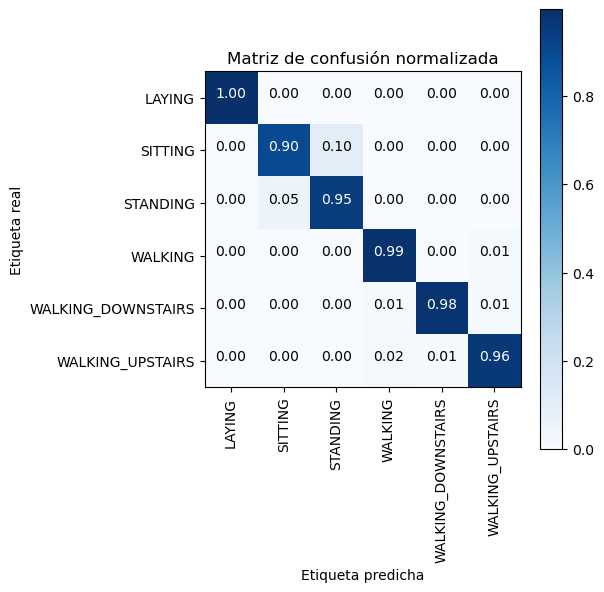

****************| Reporte de Clasificación |****************
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.94      0.90      0.92       262
          STANDING       0.91      0.95      0.93       276
           WALKING       0.98      0.99      0.98       247
WALKING_DOWNSTAIRS       0.99      0.98      0.98       206
  WALKING_UPSTAIRS       0.97      0.96      0.97       200

          accuracy                           0.96      1471
         macro avg       0.96      0.96      0.96      1471
      weighted avg       0.96      0.96      0.96      1471



==> Mejor estimador:
	LogisticRegression(C=0.1)


==> Mejores parámetros:
	Parámetros del mejor estimador: {'C': 0.1, 'penalty': 'l2'}

==> Número de conjuntos de validación cruzada:
	Número total de particiones: 3

==> Mejor puntaje:
	Puntaje promedio en validación cruzada del mejor estimador: 0.9576612133889761


In [356]:
import warnings
from sklearn import linear_model
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_gs_attributes(log_reg_grid_results['model'])

Entrenando el modelo...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Realizado....!

==> Tiempo de entrenamiento: 0:00:11.524512

Realizando predicciones con los datos de prueba...
Realizado....!

==> Tiempo de predicción: 0:00:00.003786

==> Exactitud: 0.9530931339225017


******** Matriz de confusión ********

[[277   3   0   0   0   0]
 [  0 229  33   0   0   0]
 [  0  17 258   1   0   0]
 [  0   0   0 243   0   4]
 [  0   0   0   3 202   1]
 [  0   0   0   3   4 193]]


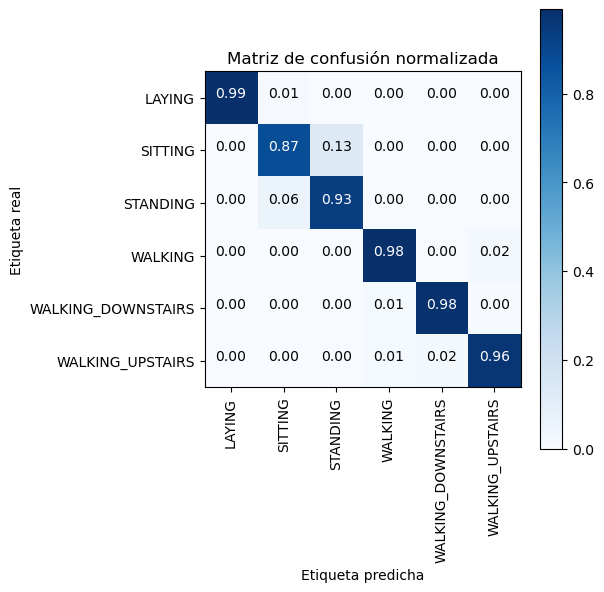

****************| Reporte de Clasificación |****************
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       280
           SITTING       0.92      0.87      0.90       262
          STANDING       0.89      0.93      0.91       276
           WALKING       0.97      0.98      0.98       247
WALKING_DOWNSTAIRS       0.98      0.98      0.98       206
  WALKING_UPSTAIRS       0.97      0.96      0.97       200

          accuracy                           0.95      1471
         macro avg       0.96      0.95      0.95      1471
      weighted avg       0.95      0.95      0.95      1471



==> Mejor estimador:
	LinearSVC(C=0.5, tol=5e-05)


==> Mejores parámetros:
	Parámetros del mejor estimador: {'C': 0.5}

==> Número de conjuntos de validación cruzada:
	Número total de particiones: 5

==> Mejor puntaje:
	Puntaje promedio en validación cruzada del mejor estimador: 0.9557899710436425


In [357]:
from sklearn.calibration import LinearSVC

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_gs_attributes(lr_svc_grid_results['model'])

Entrenando el modelo...
Realizado....!

==> Tiempo de entrenamiento: 0:00:01.259311

Realizando predicciones con los datos de prueba...
Realizado....!

==> Tiempo de predicción: 0:00:00

==> Exactitud: 0.8273283480625425


******** Matriz de confusión ********

[[263  17   0   0   0   0]
 [  6 196  60   0   0   0]
 [  1  64 211   0   0   0]
 [  0   0   0 217  12  18]
 [  0   0   0  25 166  15]
 [  0   0   0  22  14 164]]


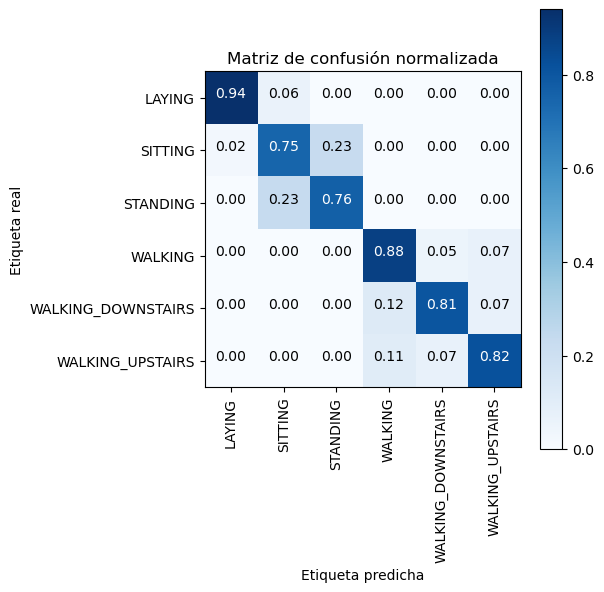

****************| Reporte de Clasificación |****************
                    precision    recall  f1-score   support

            LAYING       0.97      0.94      0.96       280
           SITTING       0.71      0.75      0.73       262
          STANDING       0.78      0.76      0.77       276
           WALKING       0.82      0.88      0.85       247
WALKING_DOWNSTAIRS       0.86      0.81      0.83       206
  WALKING_UPSTAIRS       0.83      0.82      0.83       200

          accuracy                           0.83      1471
         macro avg       0.83      0.83      0.83      1471
      weighted avg       0.83      0.83      0.83      1471



==> Mejor estimador:
	DecisionTreeClassifier(max_depth=np.int64(9))


==> Mejores parámetros:
	Parámetros del mejor estimador: {'max_depth': np.int64(9)}

==> Número de conjuntos de validación cruzada:
	Número total de particiones: 5

==> Mejor puntaje:
	Puntaje promedio en validación cruzada del mejor estimador: 0.8459462544576029


In [358]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_gs_attributes(dt_grid_results['model'])

Entrenando el modelo...
Realizado....!

==> Tiempo de entrenamiento: 0:01:26.817236

Realizando predicciones con los datos de prueba...
Realizado....!

==> Tiempo de predicción: 0:00:00.035760

==> Exactitud: 0.9340584636301835


******** Matriz de confusión ********

[[278   2   0   0   0   0]
 [  4 207  51   0   0   0]
 [  0  11 265   0   0   0]
 [  0   0   0 242   1   4]
 [  0   0   0   3 195   8]
 [  0   0   0   9   4 187]]


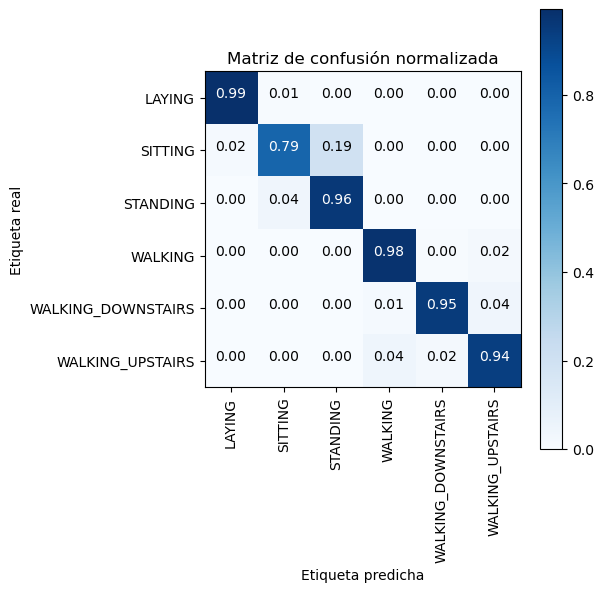

****************| Reporte de Clasificación |****************
                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       280
           SITTING       0.94      0.79      0.86       262
          STANDING       0.84      0.96      0.90       276
           WALKING       0.95      0.98      0.97       247
WALKING_DOWNSTAIRS       0.97      0.95      0.96       206
  WALKING_UPSTAIRS       0.94      0.94      0.94       200

          accuracy                           0.93      1471
         macro avg       0.94      0.93      0.93      1471
      weighted avg       0.94      0.93      0.93      1471



==> Mejor estimador:
	RandomForestClassifier(max_depth=np.int64(13), n_estimators=np.int64(170))


==> Mejores parámetros:
	Parámetros del mejor estimador: {'max_depth': np.int64(13), 'n_estimators': np.int64(170)}

==> Número de conjuntos de validación cruzada:
	Número total de particiones: 5

==> Mejor puntaje:
	Puntaje promedio e

In [359]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_gs_attributes(rfc_grid_results['model'])

In [360]:
# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.13%       3.875%
DecisionTree        : 82.73%      17.27% 
Random Forest       : 93.41%      6.594% 


### Conclusión

En la comparación de modelos clásicos de **Machine Learning**, se observa lo siguiente:

- **Regresión Logística**: Con una precisión del **96.13%**, es el modelo que ofrece el mejor rendimiento, con un error del **3.875%**. Este modelo es adecuado para datos lineales y proporciona resultados robustos con una baja tasa de error.
  
- **Árbol de Decisión**: Con una precisión del **82.73%** y un error del **17.27%**, este modelo presenta un rendimiento significativamente inferior en comparación con la regresión logística. Aunque es útil para interpretar relaciones en los datos, su rendimiento puede verse afectado por la sobreajuste en algunos casos.
  
- **Random Forest**: Con una precisión del **93.41%** y un error del **6.594%**, este modelo ofrece un buen equilibrio entre precisión y generalización. El ensemble de árboles de decisión contribuye a una mejora en el rendimiento, aunque no llega al nivel de la regresión logística.

En resumen, la **Regresión Logística** es el modelo con el mejor desempeño en términos de precisión, seguido por **Random Forest**, que también es bastante competitivo. El **Árbol de Decisión** mostró un mayor error, indicando que es menos eficaz en este caso específico.
